## Match-up impact prediction

In [1]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Exploratory Data Analysis

In [2]:
data = pd.read_csv("match_up_impact.csv")
data.head()

,Batter,Bowler,dismissed,match_played,runs_scored,ball_faced,average,strike_rate,batsman_impact
0,YBK Jaiswal,Mohammed Shami,0,3,23,18,23.0,127.778,0.942362
1,YBK Jaiswal,Yash Dayal,0,2,11,12,11.0,91.667,0.641669
2,YBK Jaiswal,Rashid Khan,0,2,13,9,13.0,144.444,0.984025
3,YBK Jaiswal,TA Boult,0,3,11,9,11.0,122.222,0.832637
4,YBK Jaiswal,R Ashwin,0,1,11,13,11.0,84.615,0.597594


In [3]:
data.tail()

,Batter,Bowler,dismissed,match_played,runs_scored,ball_faced,average,strike_rate,batsman_impact
24208,DS Lehmann,B Lee,0,1,4,3,4.0,133.333,0.858331
24209,DS Lehmann,JR Hopes,0,1,5,5,5.0,100.000,0.656250
24210,DS Lehmann,MF Maharoof,0,1,1,2,1.0,50.000,0.318750
24211,AA Noffke,AB Agarkar,0,1,2,8,2.0,25.000,0.168750
24212,AA Noffke,SC Ganguly,0,1,7,4,7.0,175.000,1.137500


From the player match-up dataset, we can get Batter, Bowler, dismissed, match_played, runs_scored, ball_faced, average, strike_rate as independent column. Batsman_impact as dependent and targeted column. We have to find the r2_score percentage because the target column has continuous values and using that we have to predict batsman impact on every bowler.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24213 entries, 0 to 24212
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Batter          24213 non-null  object 
 1   Bowler          24213 non-null  object 
 2   dismissed       24213 non-null  int64  
 3   match_played    24213 non-null  int64  
 4   runs_scored     24213 non-null  int64  
 5   ball_faced      24213 non-null  int64  
 6   average         24213 non-null  float64
 7   strike_rate     24213 non-null  float64
 8   batsman_impact  24213 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [5]:
data.isnull().sum()

Batter            0
Bowler            0
dismissed         0
match_played      0
runs_scored       0
ball_faced        0
average           0
strike_rate       0
batsman_impact    0
dtype: int64

In [6]:
data.describe()

,dismissed,match_played,runs_scored,ball_faced,average,strike_rate,batsman_impact
count,24213.000000,24213.000000,24213.000000,24213.000000,24213.000000,24213.000000,24213.000000
mean,0.005369,1.927147,11.604469,9.331929,11.572582,116.022483,0.797469
std,0.099831,1.752668,15.010791,11.016807,14.925147,76.280048,0.516536
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,3.000000,2.000000,66.667000,0.429169
50%,0.000000,1.000000,7.000000,6.000000,7.000000,100.000000,0.704606
75%,0.000000,2.000000,15.000000,11.000000,15.000000,152.000000,1.096875
max,4.000000,20.000000,176.000000,134.000000,176.000000,600.000000,3.862500


In [7]:
data.shape

(24213, 9)

Data Visualisation

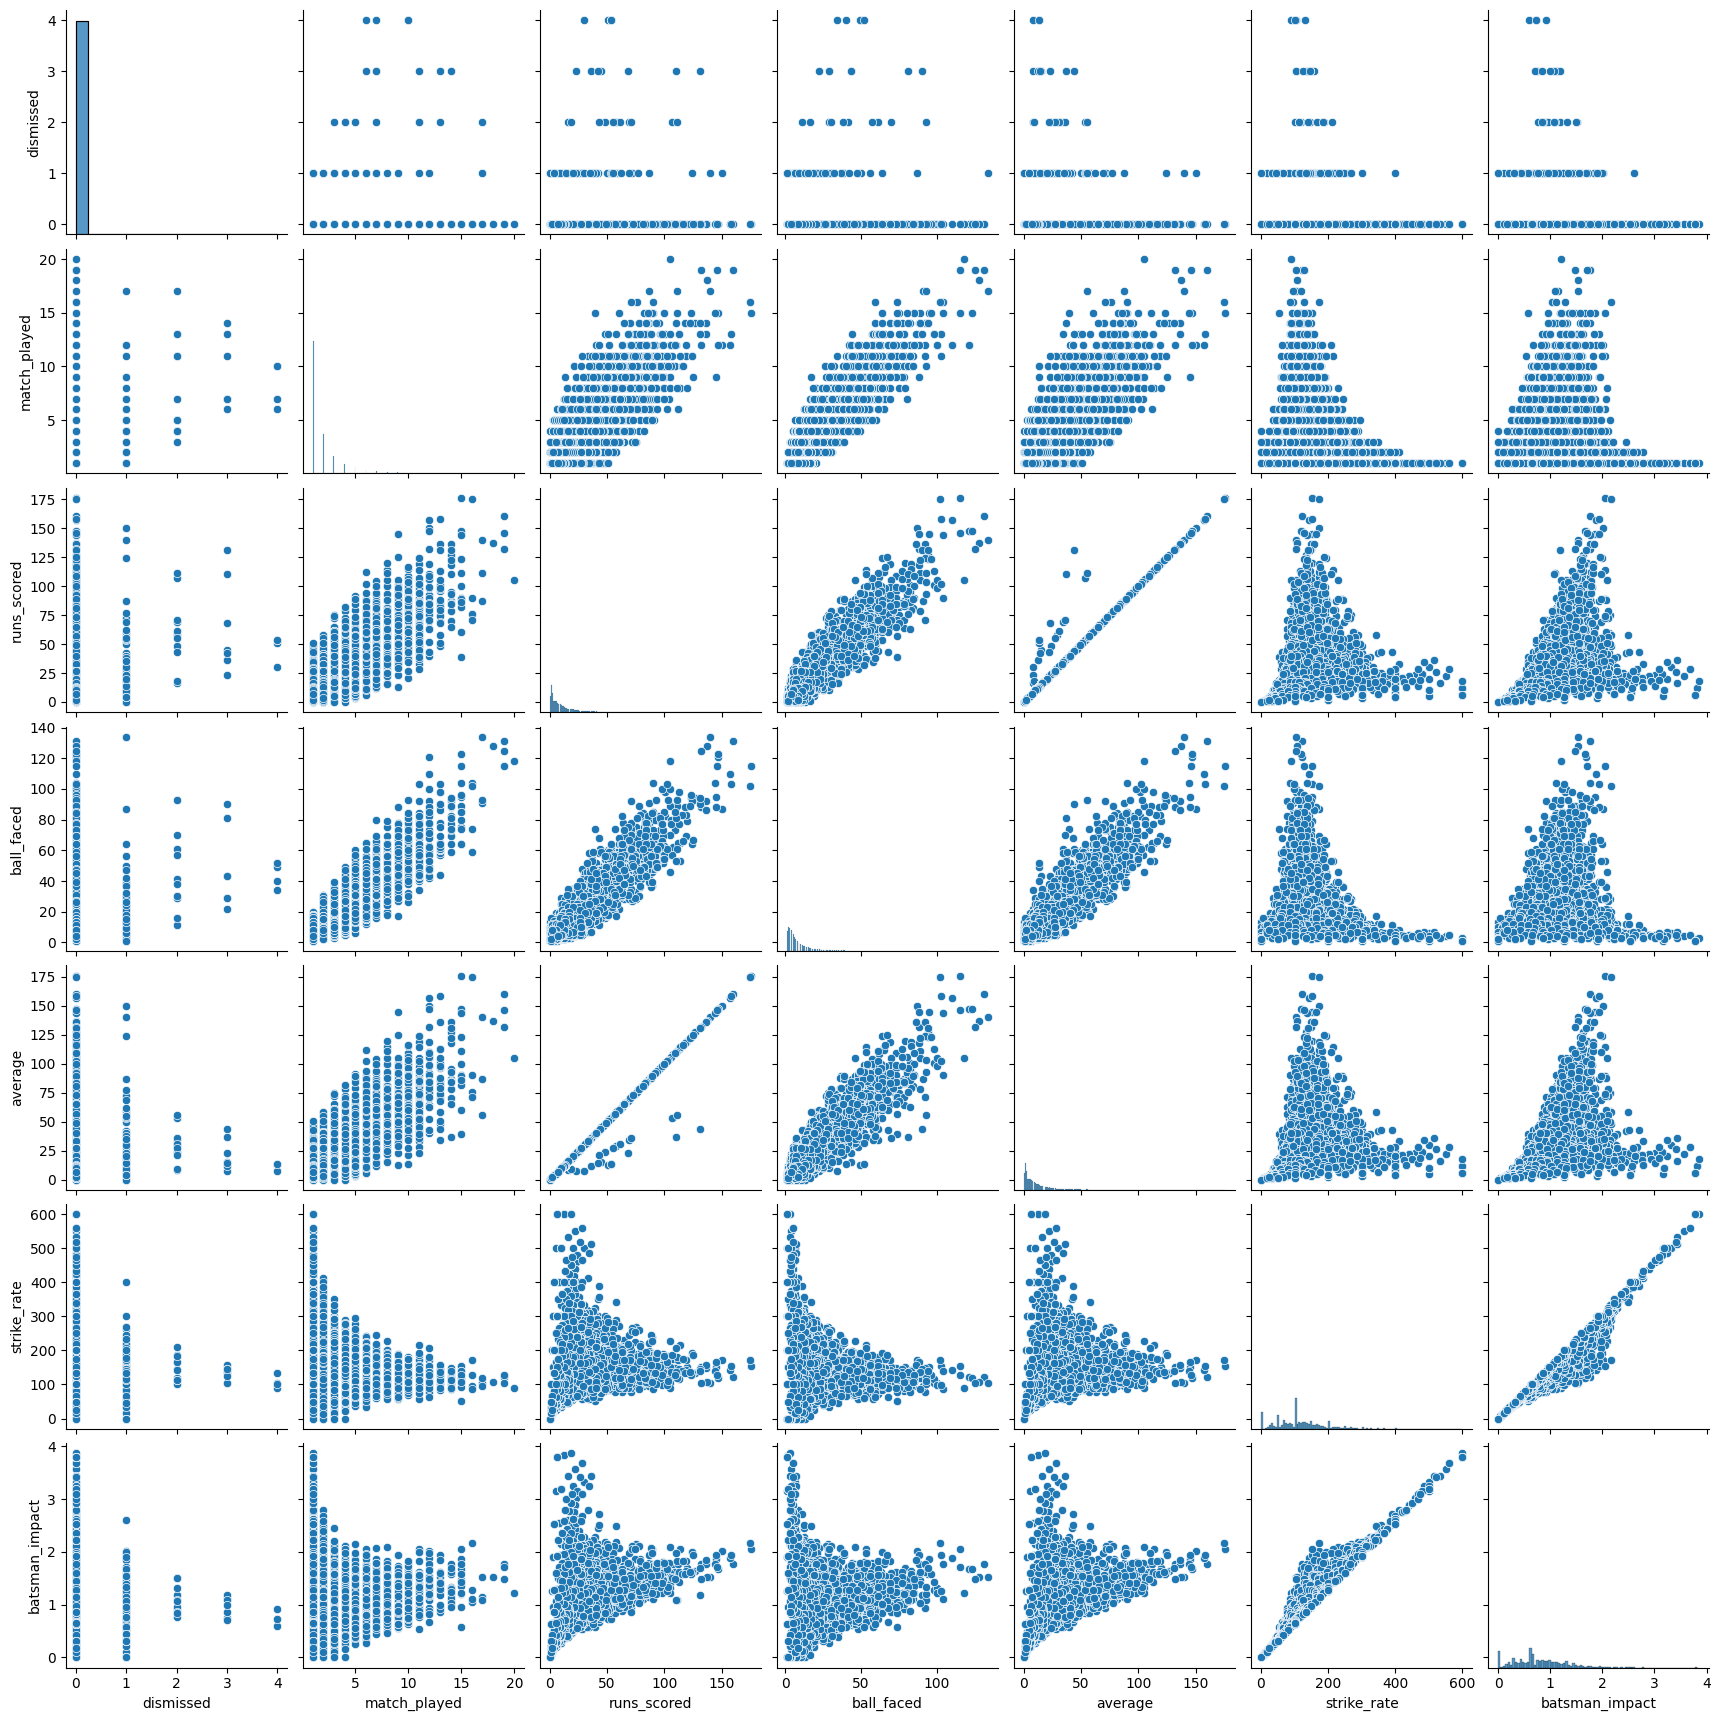

In [8]:
sns.pairplot(data=data)               #data visualization using pairplot

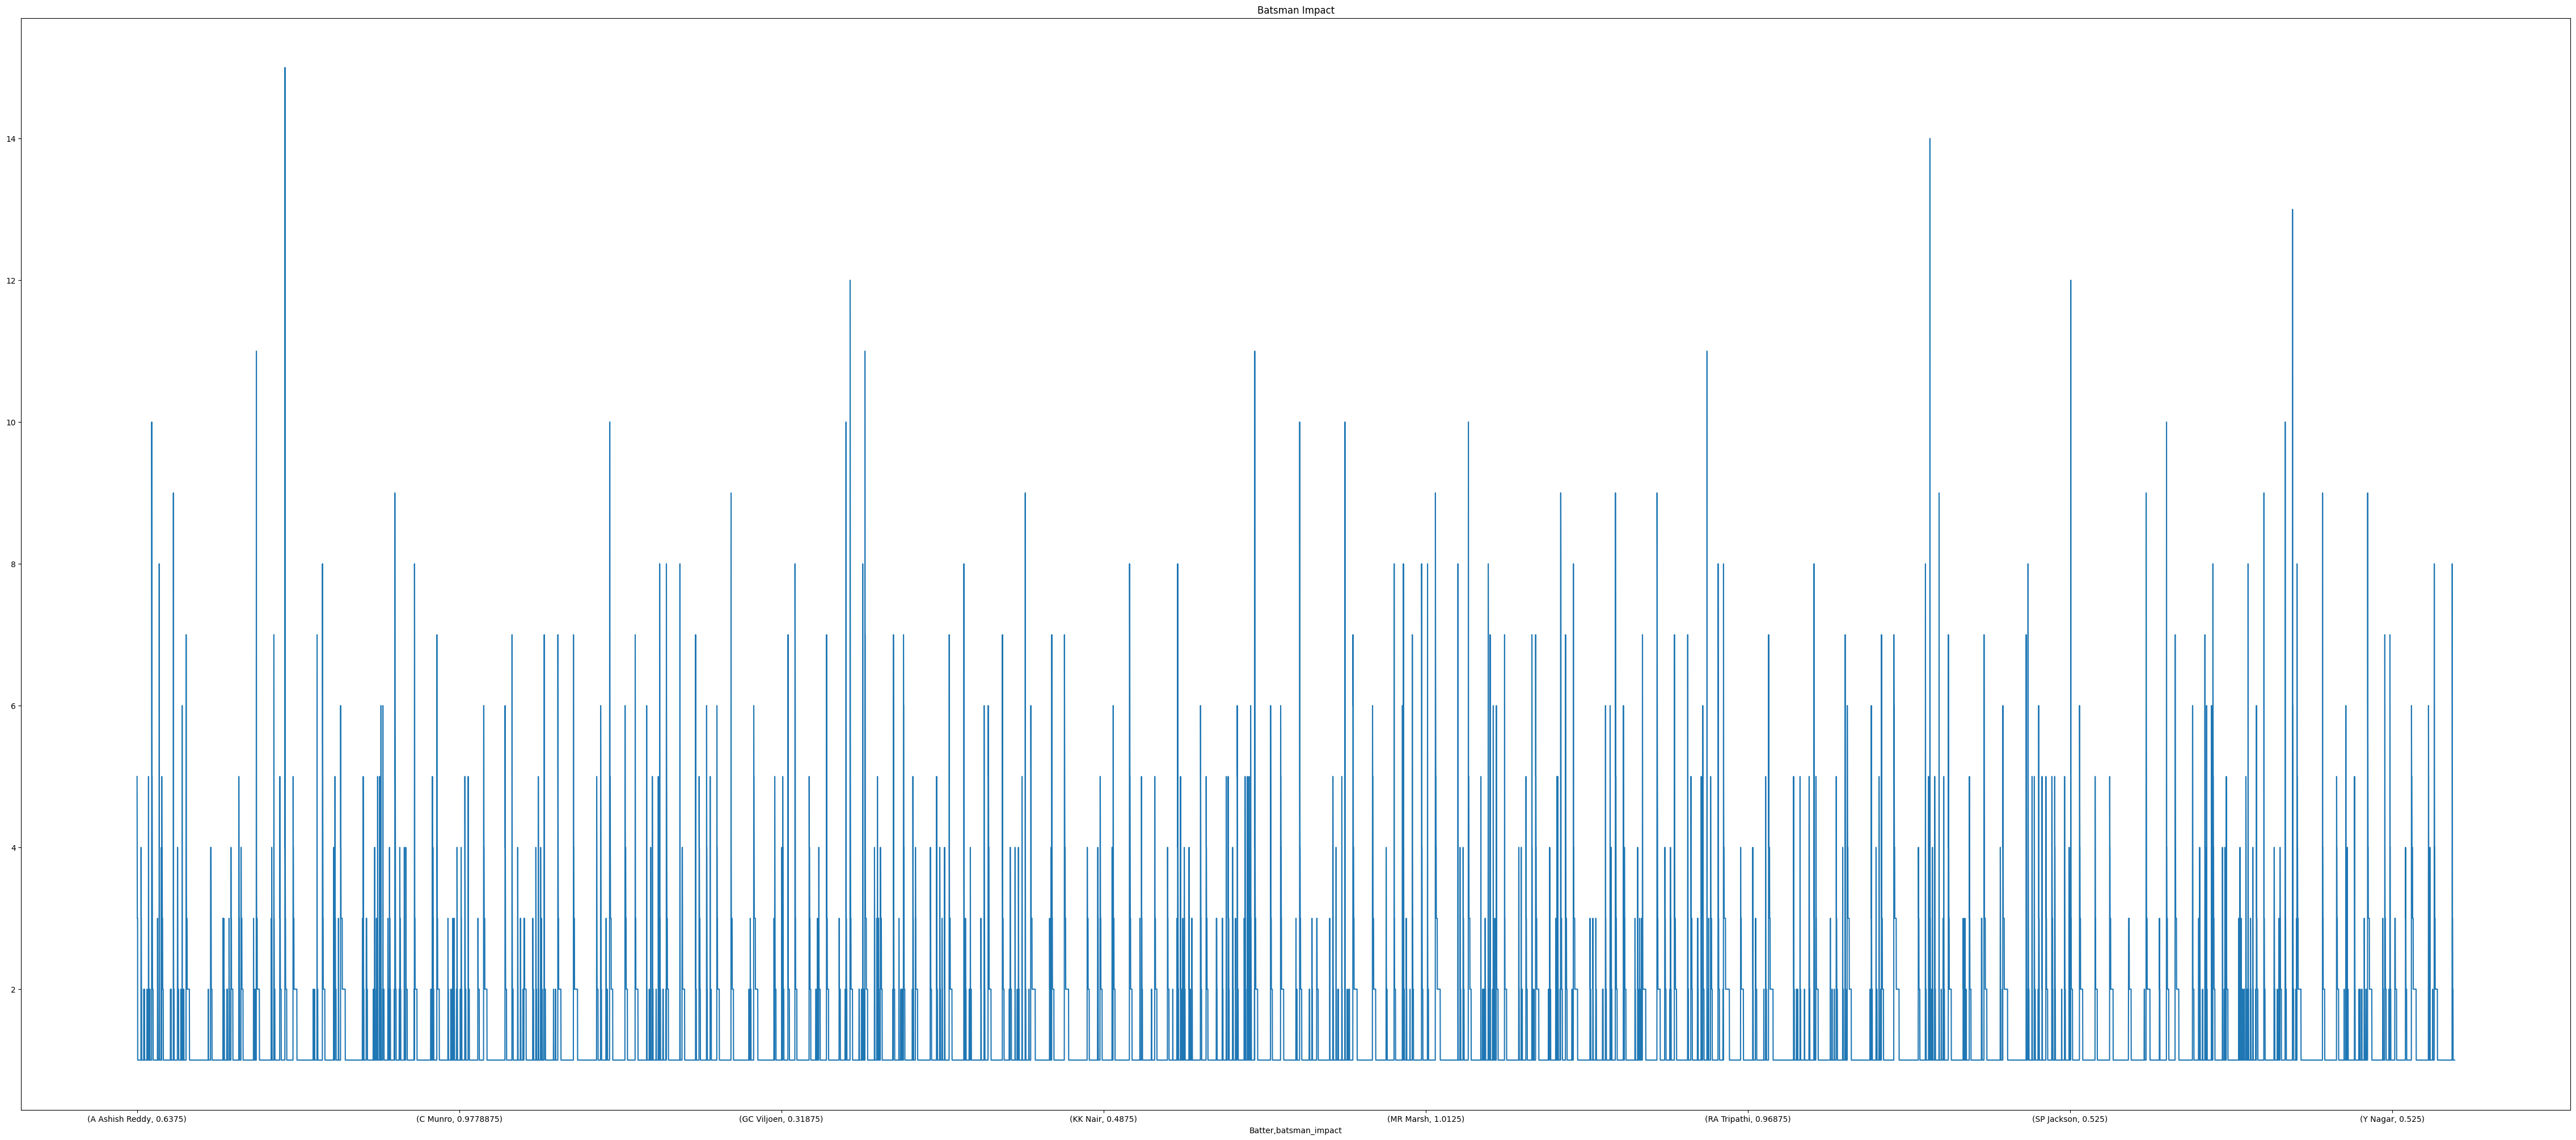

In [9]:
plt.figure(figsize=(58,25))
plt.xticks(rotation=90)
data.groupby('Batter').batsman_impact.value_counts().plot()
plt.title('Batsman Impact')
plt.show()

In [10]:
batsman = data.groupby('Batter')
yj = batsman.get_group('YBK Jaiswal')
yj                                        #taking batter 'YBK Jaiswal' for analysis

,Batter,Bowler,dismissed,match_played,runs_scored,ball_faced,average,strike_rate,batsman_impact
0,YBK Jaiswal,Mohammed Shami,0,3,23,18,23.0,127.778,0.942362
1,YBK Jaiswal,Yash Dayal,0,2,11,12,11.0,91.667,0.641669
2,YBK Jaiswal,Rashid Khan,0,2,13,9,13.0,144.444,0.984025
3,YBK Jaiswal,TA Boult,0,3,11,9,11.0,122.222,0.832637
4,YBK Jaiswal,R Ashwin,0,1,11,13,11.0,84.615,0.597594
5,YBK Jaiswal,Mohammed Siraj,0,3,24,19,24.0,126.316,0.939475
6,YBK Jaiswal,JR Hazlewood,0,2,38,13,38.0,292.308,2.064425
7,YBK Jaiswal,GJ Maxwell,0,2,9,7,9.0,128.571,0.859819
8,YBK Jaiswal,Shahbaz Ahmed,0,1,3,2,3.0,150.000,0.956250
9,YBK Jaiswal,HV Patel,0,2,11,9,11.0,122.222,0.832637


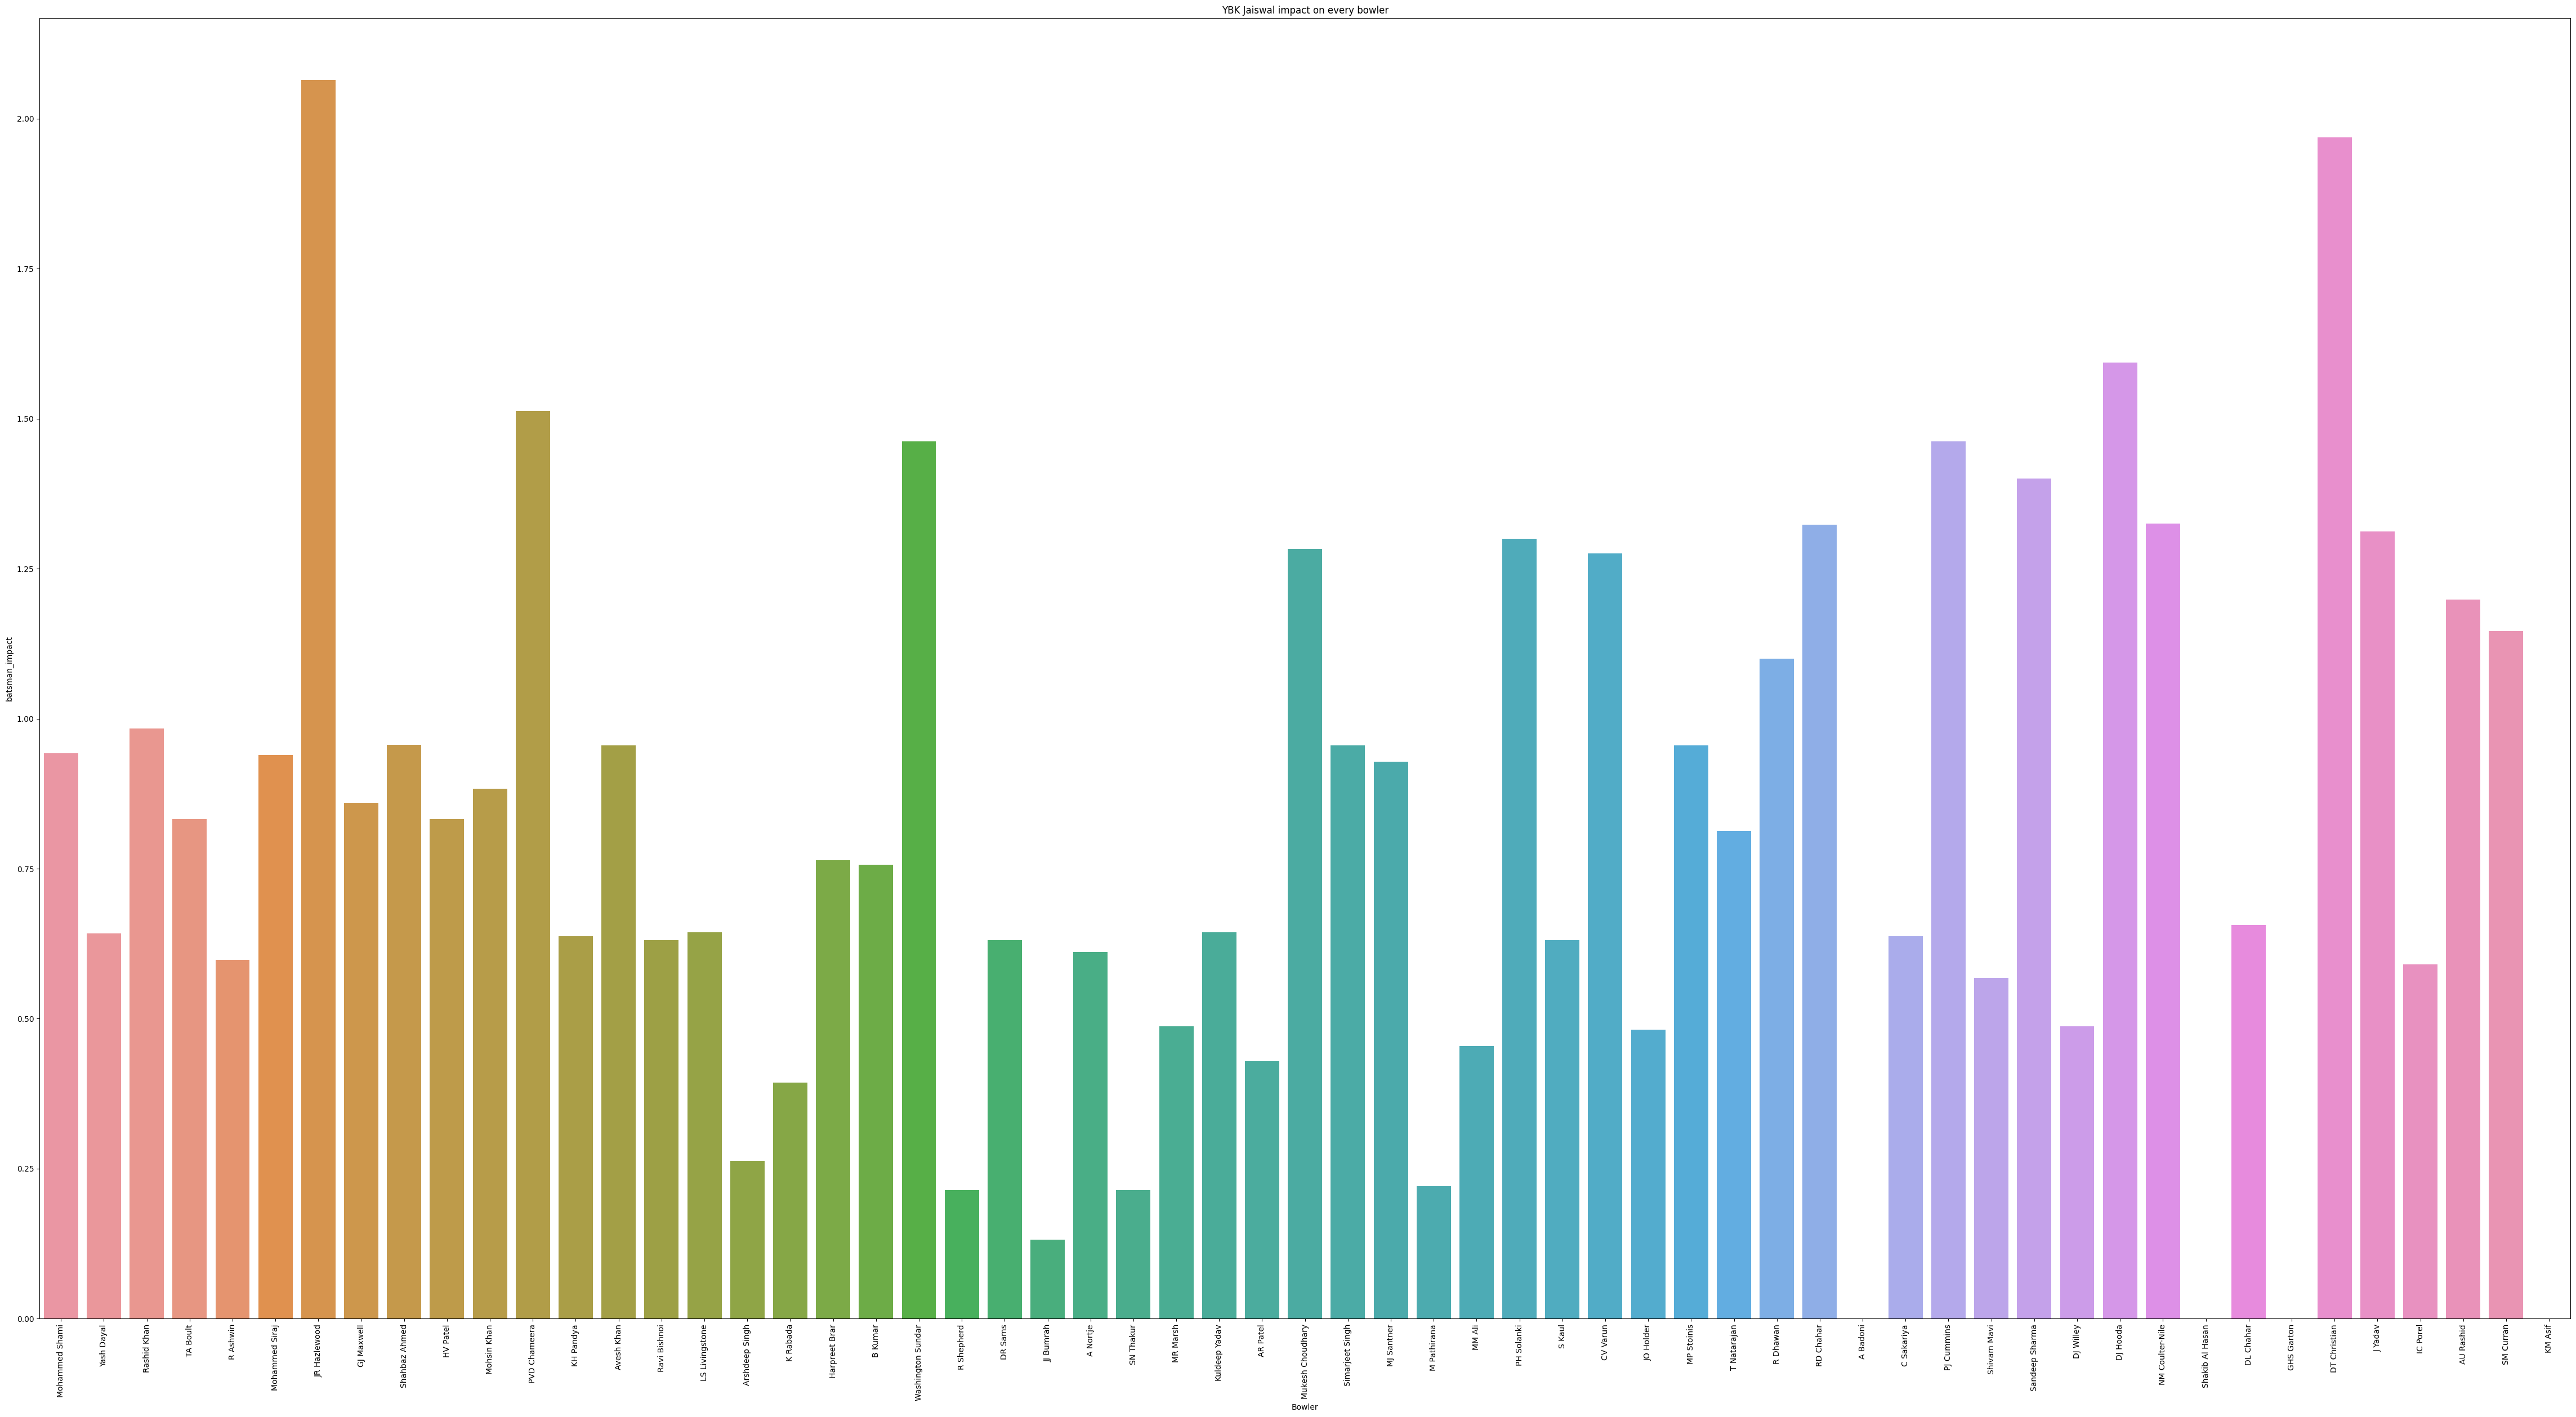

In [11]:
plt.figure(figsize=(58,30))
plt.xticks(rotation=90)
sns.barplot(data=yj, x = 'Bowler', y = 'batsman_impact')
plt.title('YBK Jaiswal impact on every bowler')
plt.show()                                                 #barplot the batter 'YBK Jaiswal' impact on every bowler


From the above graph, we can conclude that batter 'YBK jaiswal' has higher impact on bowler 'JR Hazlewood'

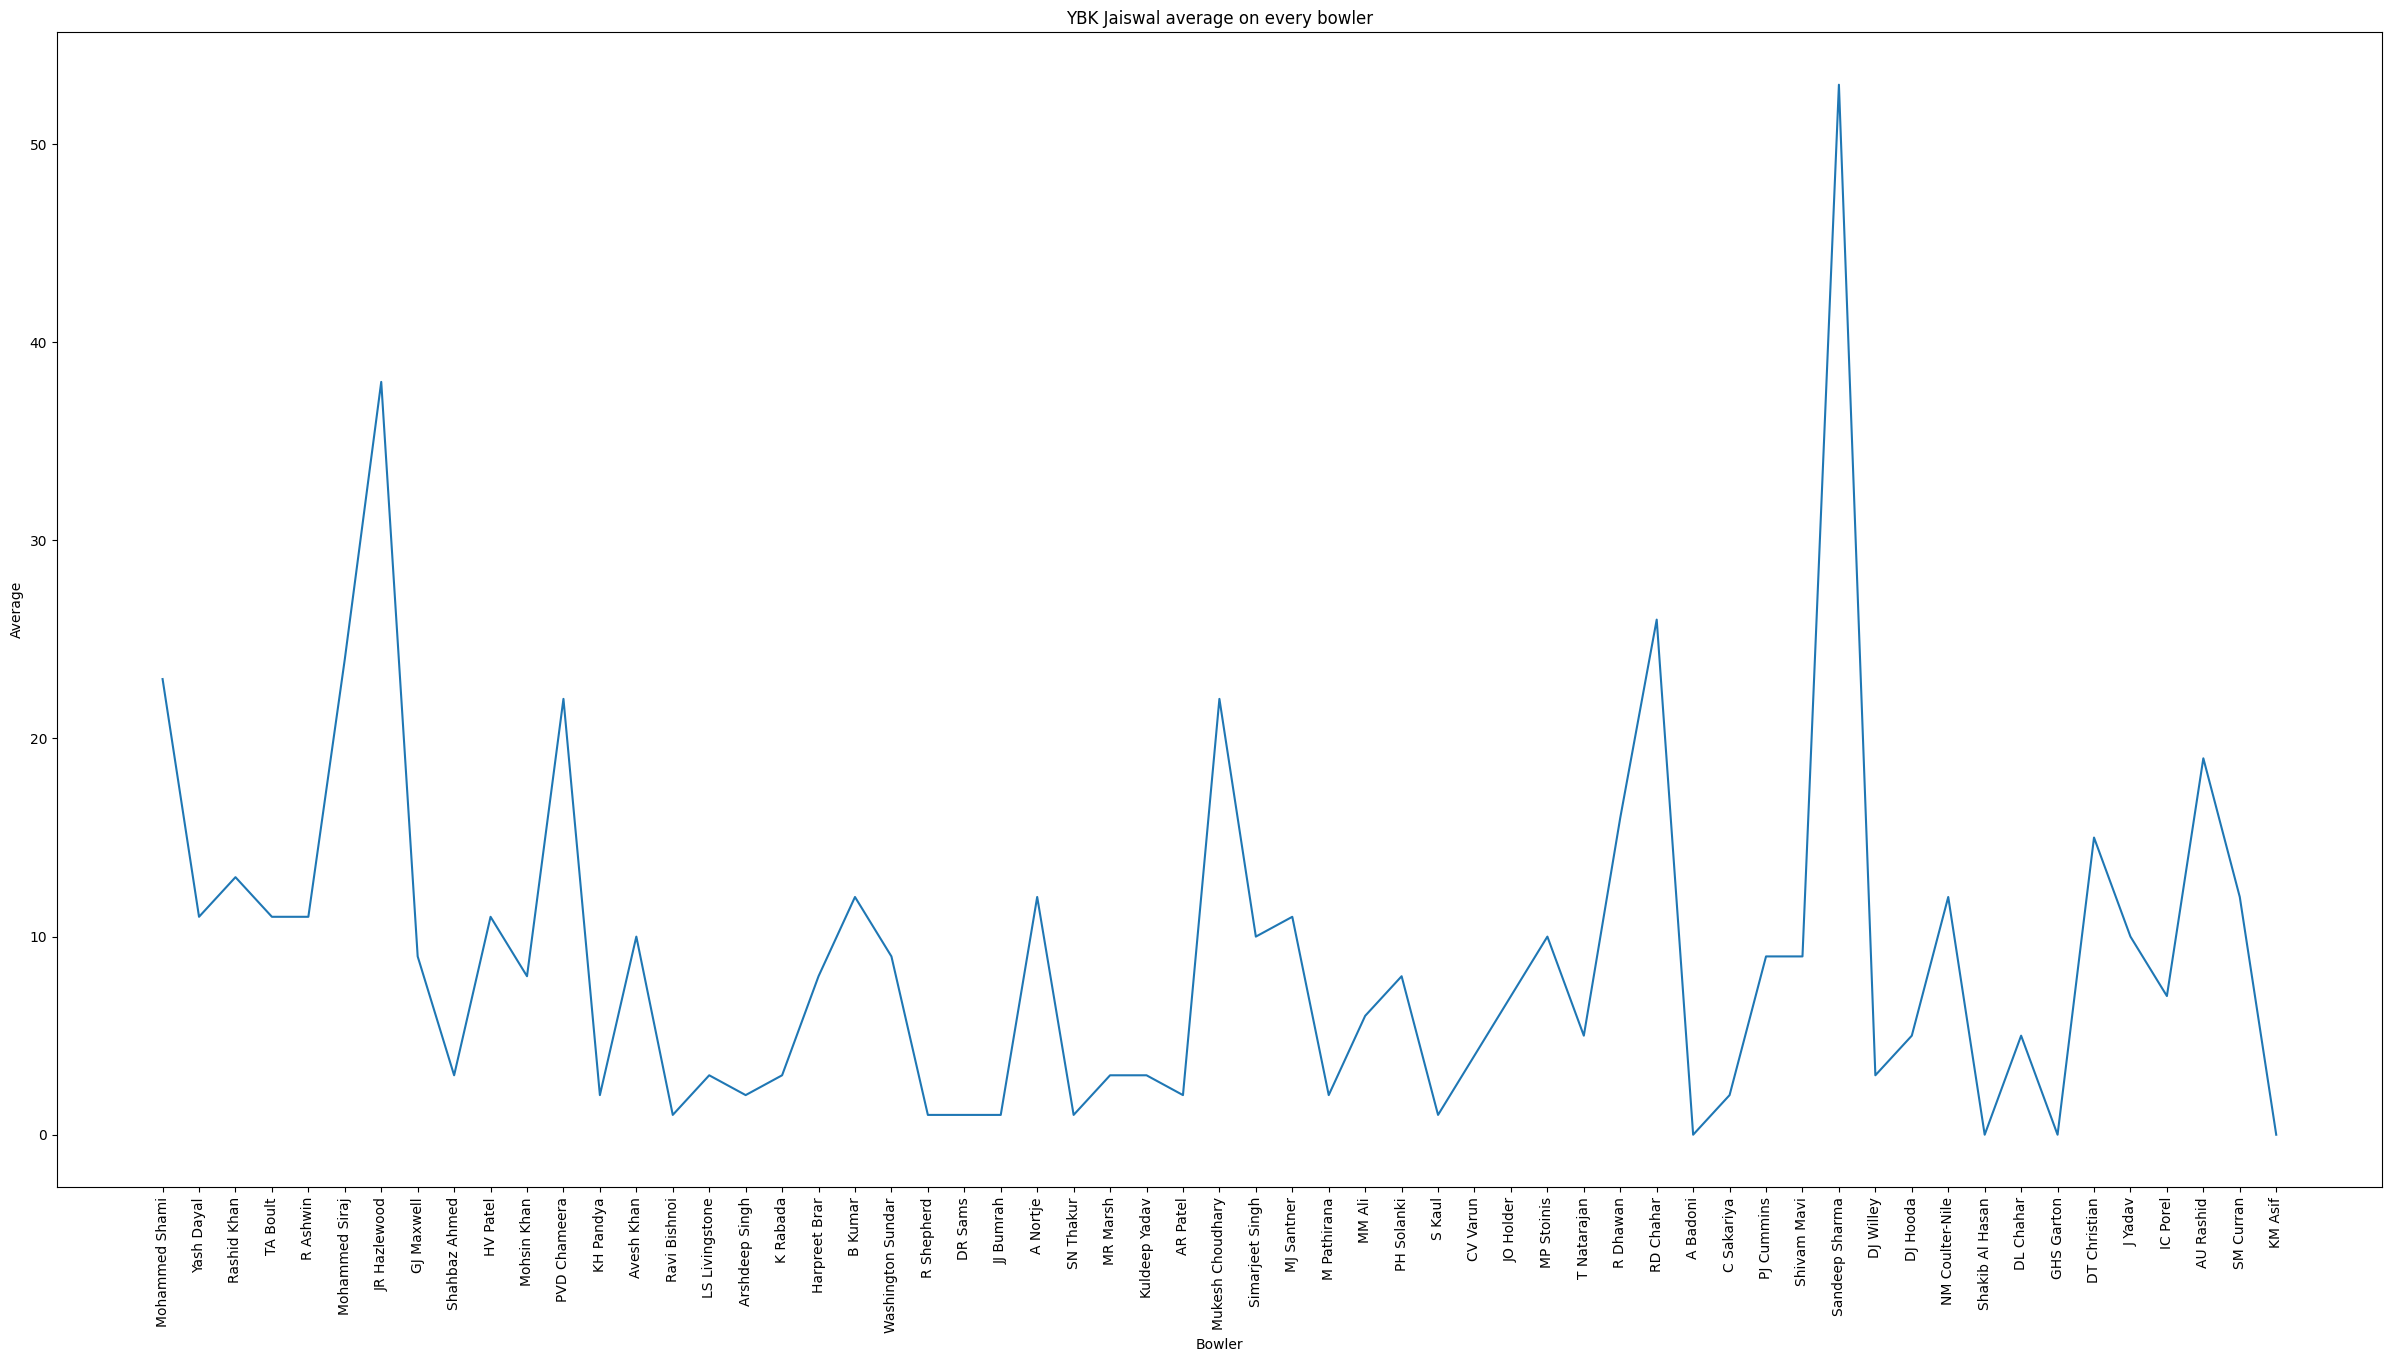

In [12]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
plt.plot(yj['Bowler'], yj['average'])
plt.xlabel('Bowler')
plt.ylabel('Average')
plt.title('YBK Jaiswal average on every bowler')
plt.show()                                           #lineplot the batter 'YBK Jaiswal' average on every bowler


From the above graph, we can conclude that batter 'YBK jaiswal' has higher average on bowler 'Sandeep Sharma'

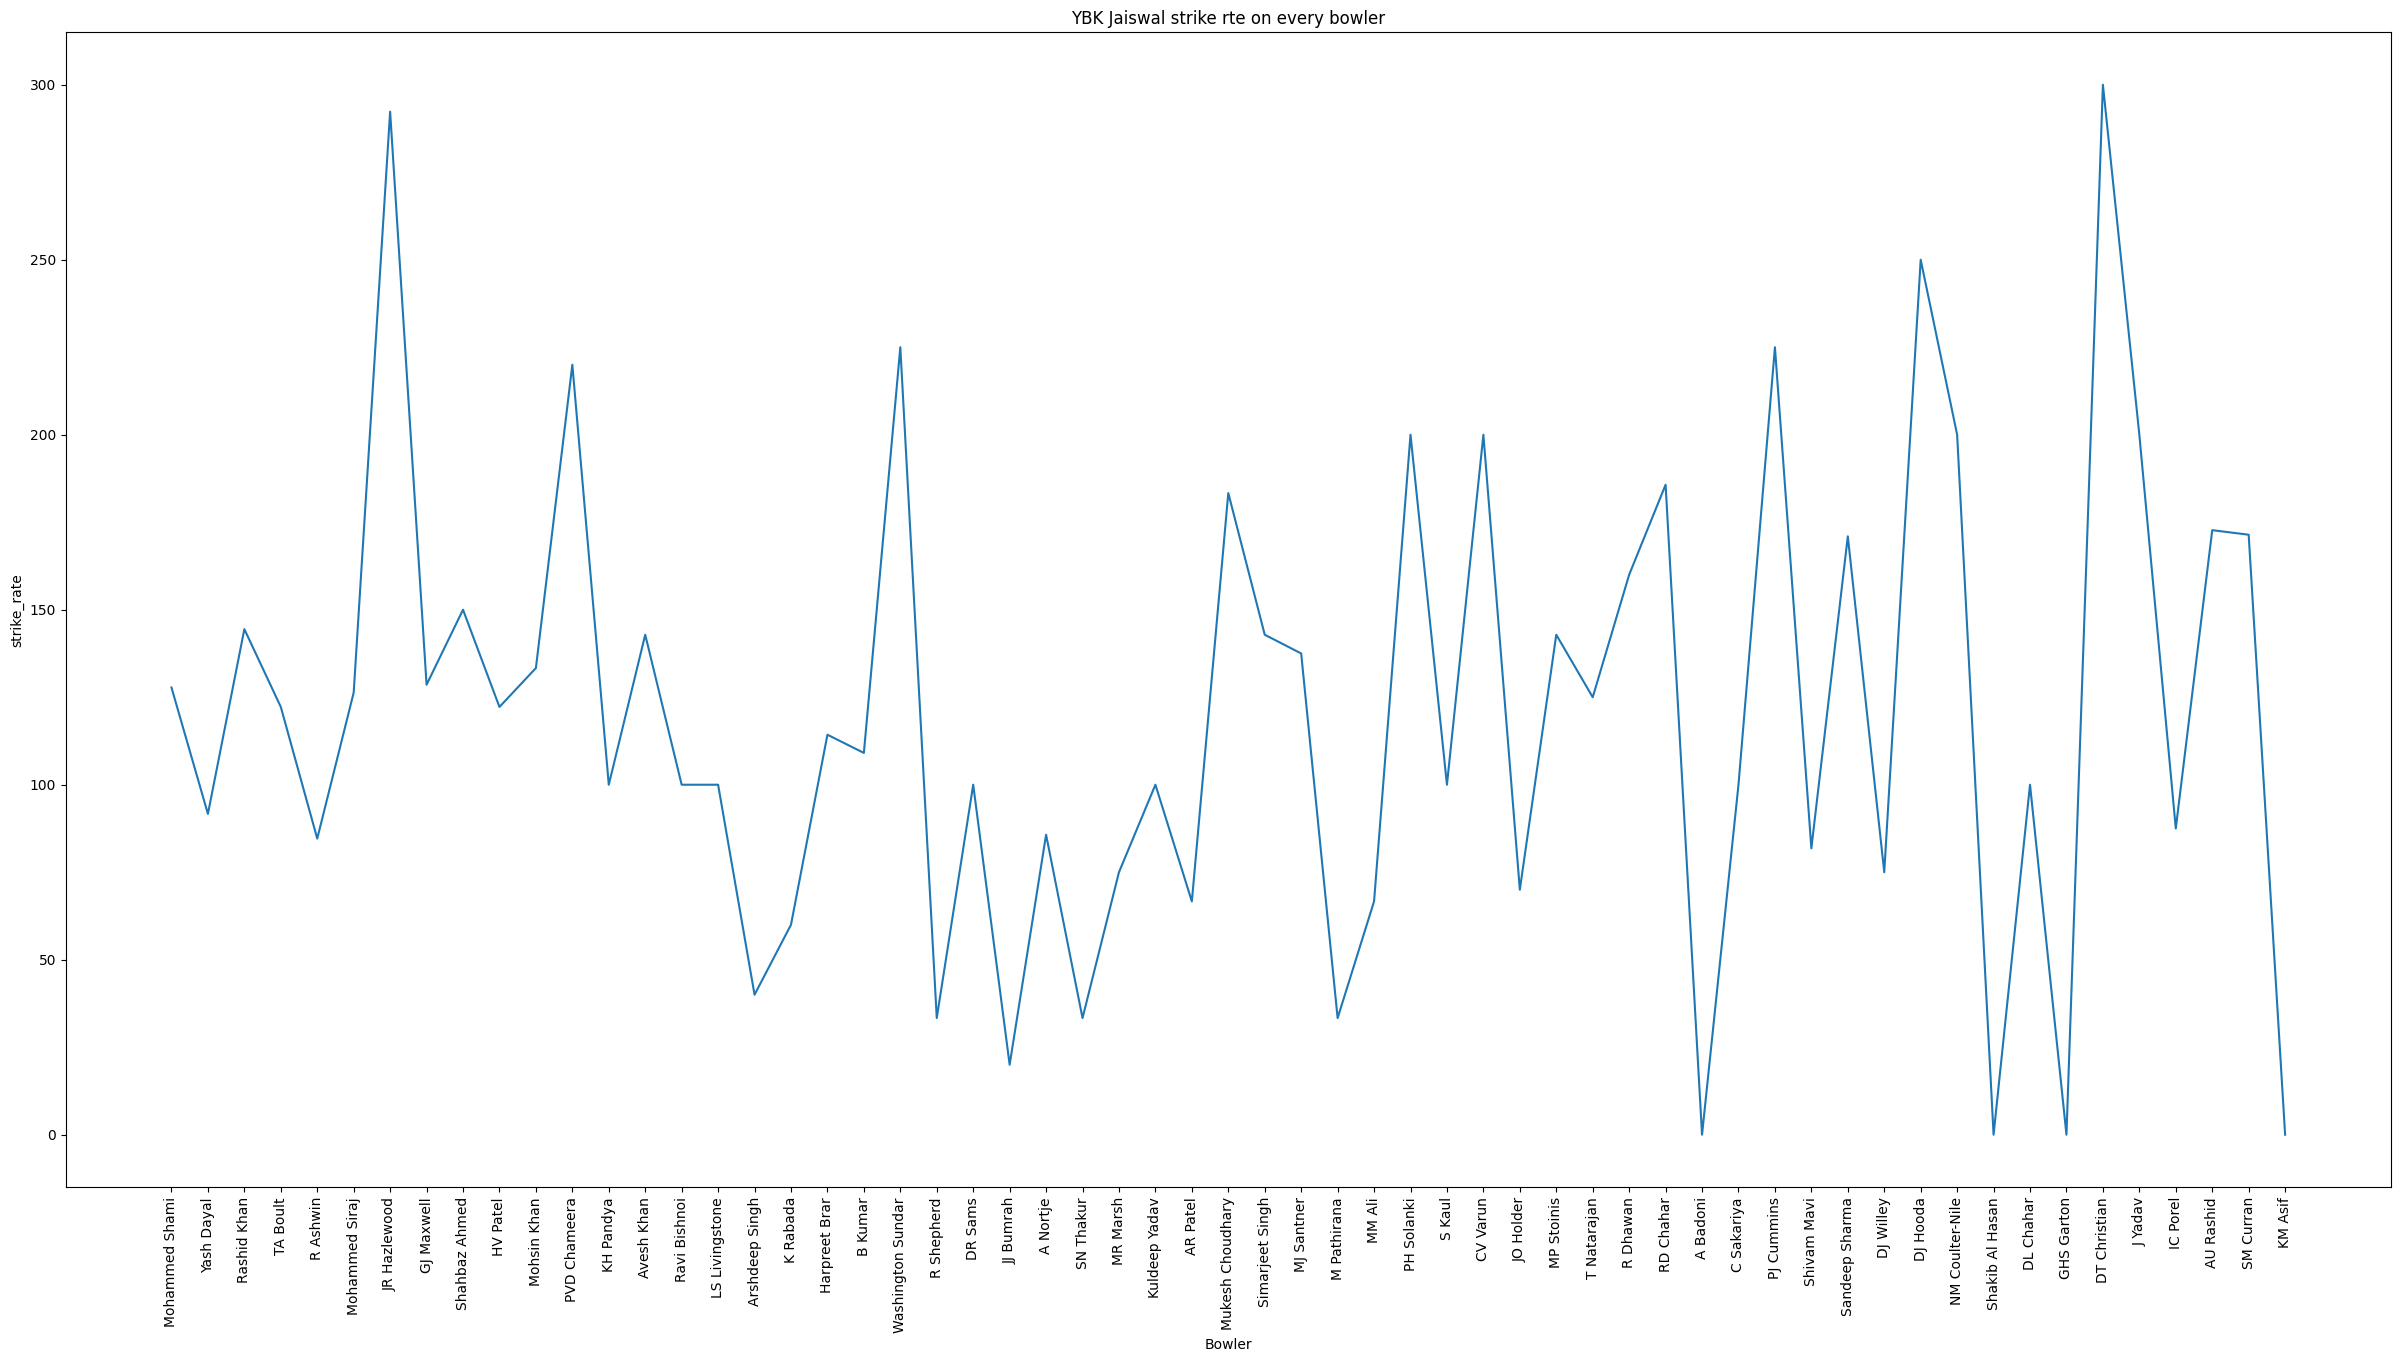

In [13]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
plt.plot(yj['Bowler'], yj['strike_rate'])
plt.xlabel('Bowler')
plt.ylabel('strike_rate')
plt.title('YBK Jaiswal strike rte on every bowler')
plt.show()                                             #lineplot the batter 'YBK Jaiswal' strike rate on every bowler

From the above graph, we can conclude that batter 'YBK jaiswal' has higher strike rate on bowler 'DT Christian'

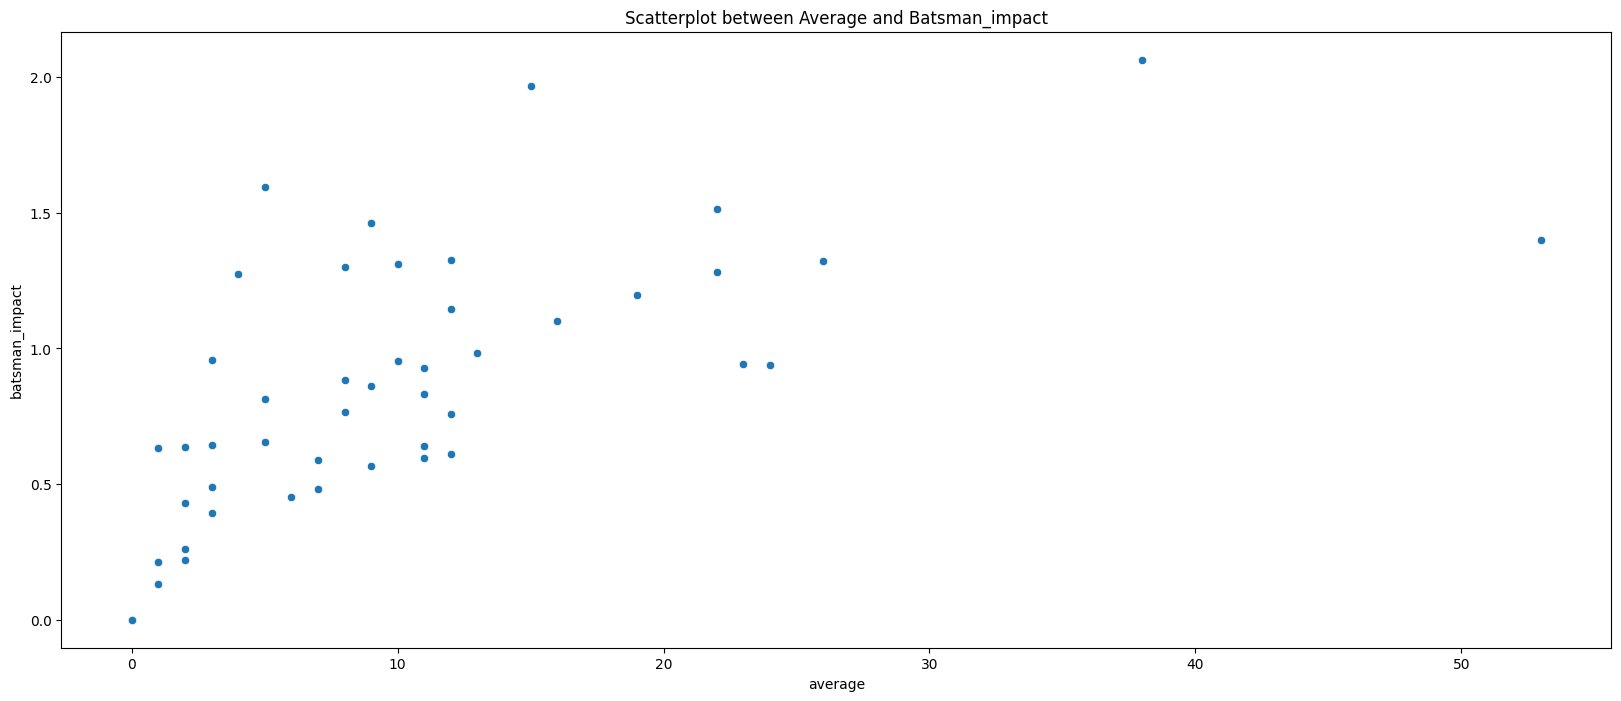

In [14]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=yj, x = 'average', y = 'batsman_impact')
plt.title('Scatterplot between Average and Batsman_impact')
plt.show()                                                     #scatterplot betwwen average and batsman_impact of 'YBK Jaiswal'

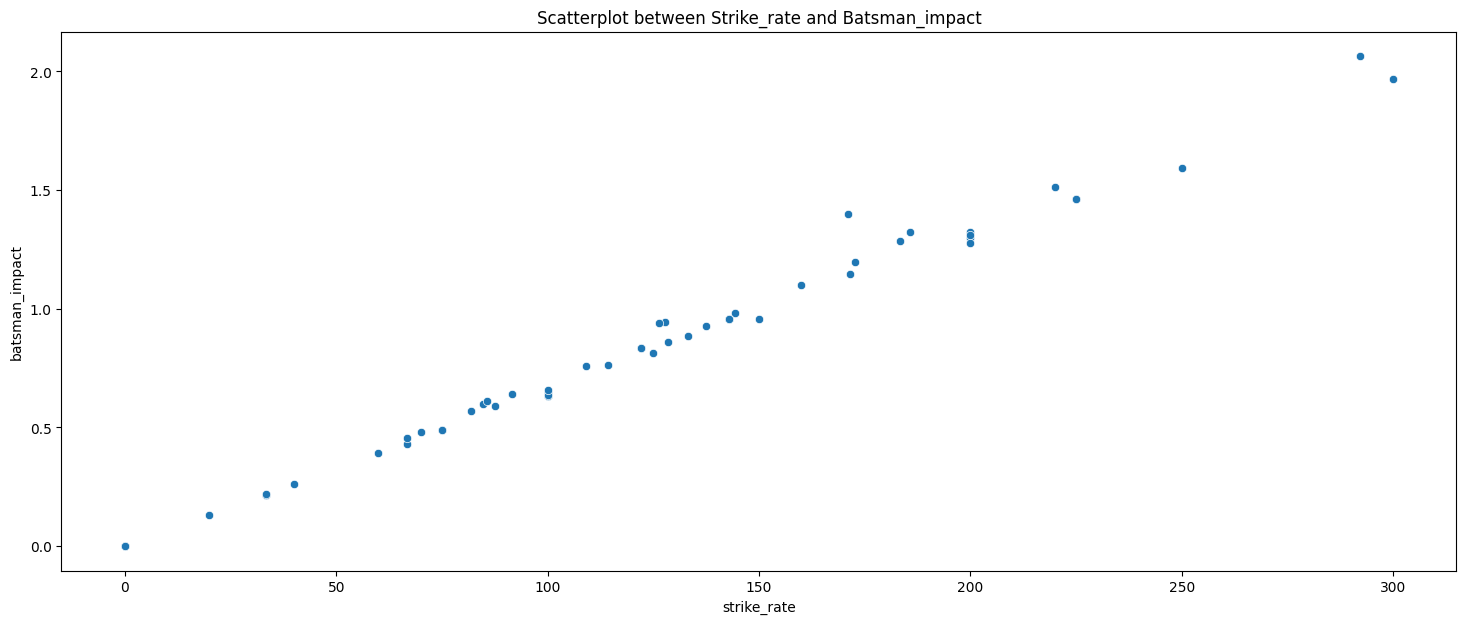

In [15]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=yj, x = 'strike_rate', y = 'batsman_impact')
plt.title('Scatterplot between Strike_rate and Batsman_impact')
plt.show()                                                         #scatterplot betwwen strike_rate and batsman_impact of 'YBK Jaiswal'

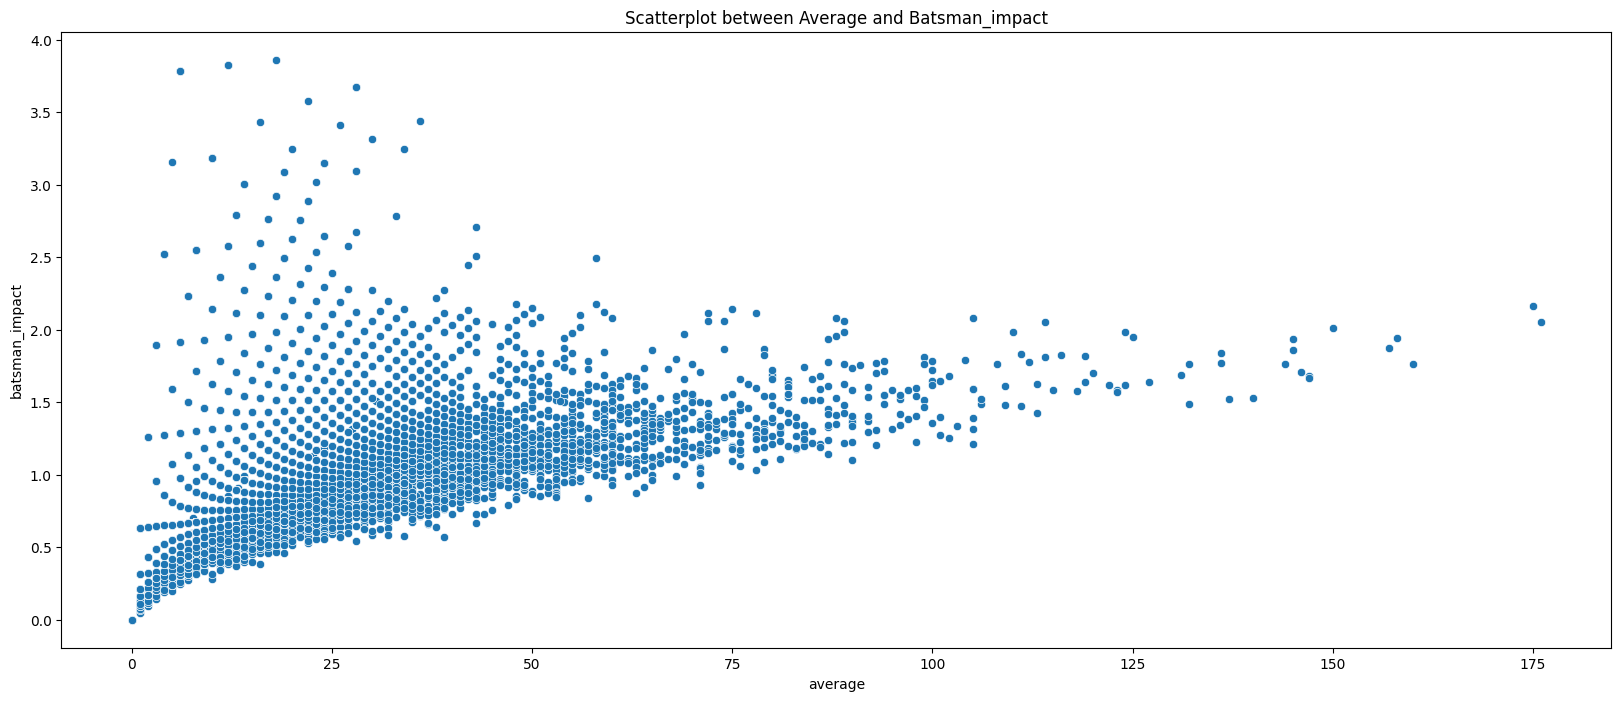

In [16]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=data, x = 'average', y = 'batsman_impact')
plt.title('Scatterplot between Average and Batsman_impact')
plt.show()                                                       #scatterplot betwwen average and batsman_impact of all batter

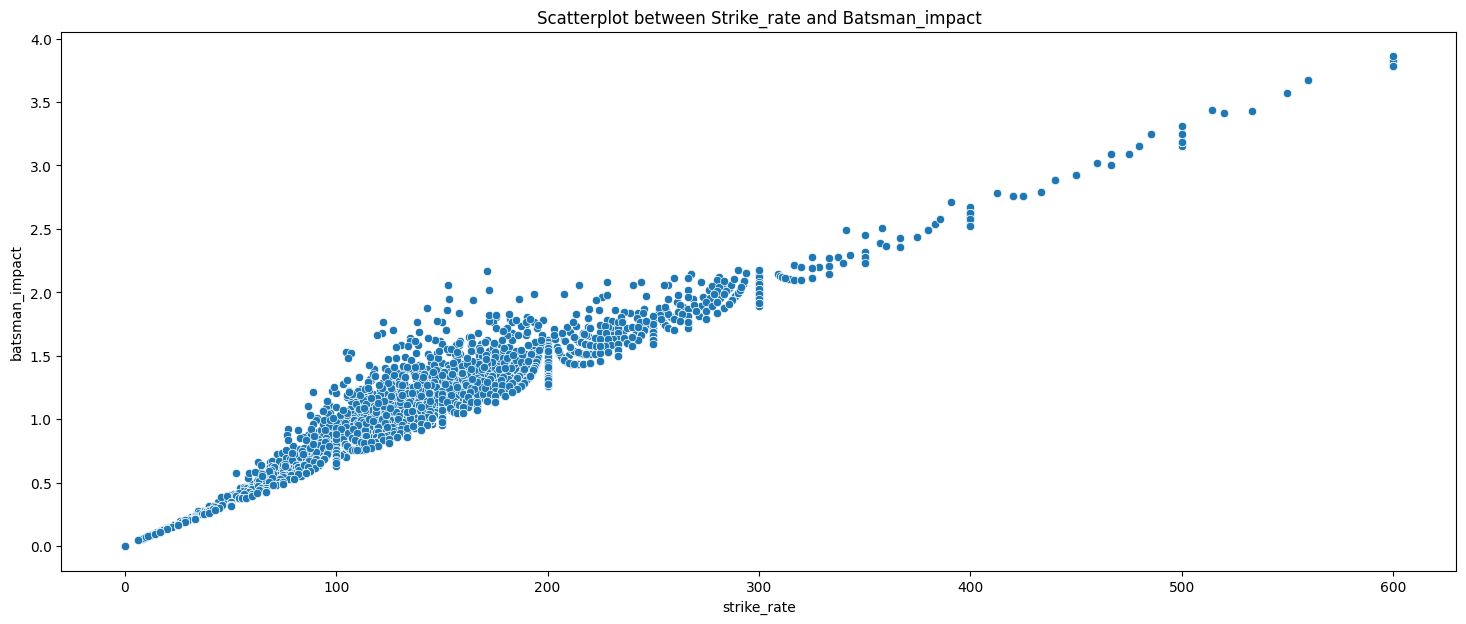

In [17]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=data, x = 'strike_rate', y = 'batsman_impact')
plt.title('Scatterplot between Strike_rate and Batsman_impact')
plt.show()                                                           #scatterplot between strike_rate and batsman_impact of all batter

Data Preprocessing

In [18]:
encode = LabelEncoder()
columns = ['Batter', 'Bowler']
for column in columns:
  data[column] = encode.fit_transform(data[column])
data.head(59)                                            #Encoding the dataset

,Batter,Bowler,dismissed,match_played,runs_scored,ball_faced,average,strike_rate,batsman_impact
0,596,275,0,3,23,18,23.0,127.778,0.942362
1,596,469,0,2,11,12,11.0,91.667,0.641669
2,596,355,0,2,13,9,13.0,144.444,0.984025
3,596,432,0,3,11,9,11.0,122.222,0.832637
4,596,317,0,1,11,13,11.0,84.615,0.597594
5,596,276,0,3,24,19,24.0,126.316,0.939475
6,596,186,0,2,38,13,38.0,292.308,2.064425
7,596,140,0,2,9,7,9.0,128.571,0.859819
8,596,415,0,1,3,2,3.0,150.000,0.956250
9,596,148,0,2,11,9,11.0,122.222,0.832637


Train Dataset

In [19]:
x=data.drop('batsman_impact', axis=1)
y=data['batsman_impact']                       #Assigning x and y variables

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 58)  #spliting the dataset using train and test

Model Development

In [21]:
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), KNeighborsRegressor()]

In [22]:
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r_sq_score= r2_score(y_test, y_pred)
    print(f"{model} : \t R2 Score = {r_sq_score:.2f}")

LinearRegression() : 	 R2 Score = 1.00
DecisionTreeRegressor() : 	 R2 Score = 1.00
RandomForestRegressor() : 	 R2 Score = 1.00
KNeighborsRegressor() : 	 R2 Score = 0.99


We are choosing the model which gives more r2 score percentage. So we are going with LinearRegression

In [23]:
reg = LinearRegression()
reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('mse value: ', mse)
print('mae value: ', mae)

mse value:  2.4304587374145268e-31
mae value:  3.794455809174724e-16


From this, we can conclude that the model is able to correctly predict the batsman_impact on every bowler with an accuracy of 100%